In [1]:
import glob
import pandas as pd
import seaborn as sns

# Business

Raw data pulled from [here](https://unstats.un.org/unsd/snaama/Downloads)

In [2]:
df = pd.read_excel("../raw_data/business/GDPcurrent-USD-countries.xlsx", header=2).drop(columns=["CountryID"])
manufacturing = df[df["IndicatorName"] == "Manufacturing (ISIC D)"].drop(columns=["IndicatorName"])
manufacturing = pd.melt(manufacturing, id_vars=["Country"], var_name="Year", value_name="Value")

manufacturing.groupby("Country").max().reset_index().sort_values(by="Value").tail(5)

,Country,Year,Value
157,Republic of Korea,2022,4.634545e+11
78,Germany,2022,8.090322e+11
99,Japan,2022,1.301642e+12
207,United States,2022,2.649697e+12
40,China,2022,5.063209e+12


<AxesSubplot:xlabel='Year', ylabel='Value'>

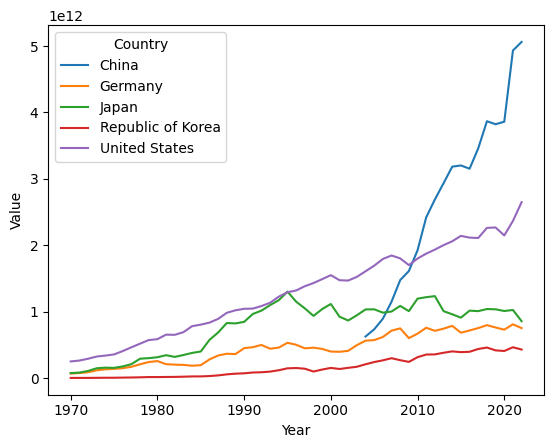

In [3]:
countries = ["United States", "China", "Germany", "Japan", "Republic of Korea"]
selected_countries = manufacturing[manufacturing["Country"].isin(countries)]

sns.lineplot(x="Year", y="Value", data=selected_countries, hue="Country")

/tmp/ipykernel_55717/2642139420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_countries.loc[indices, "Percent of US"] = selected_countries.loc[indices, "Value"].values / selected_countries.loc[selected_countries.Country == "United States", "Value"].values


<AxesSubplot:xlabel='Year', ylabel='Percent of US'>

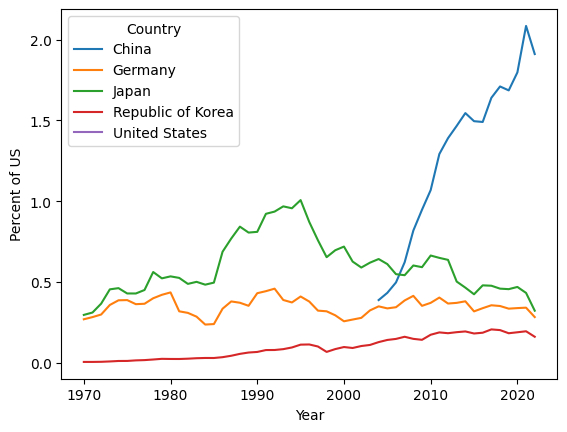

In [4]:
for country in countries[1:]:
    indices = selected_countries.Country == country
    selected_countries.loc[indices, "Percent of US"] = selected_countries.loc[indices, "Value"].values / selected_countries.loc[selected_countries.Country == "United States", "Value"].values

sns.lineplot(x="Year", y="Percent of US", data=selected_countries, hue="Country")

## Occupations
Raw data pulled from [here](https://www.bls.gov/oes/tables.htm)

In [5]:
all_data = pd.DataFrame()
for file_name in glob.iglob("../raw_data/*nat/national*"):
    data = pd.read_excel(file_name)

    year_string = file_name.split("national_")[1]
    index = year_string.find("2")
    if index == -1:
        index = year_string.find("1")

    if index == -1:
        continue
    data["year"] = int(year_string[index:index+4])
    
    all_data = pd.concat([all_data, data])